In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df, y = fetch_california_housing(return_X_y=True, as_frame=True)
df.describe()

In [ ]:
# Visualizar correlação entre as variáveis 
df['prices'] = y
df.corr(method='pearson')

In [ ]:
# RERESSÃO LINEAR para MedInc
X = df['MedInc']
results = sm.OLS(y, sm.add_constant(X)).fit()
print(results.params)
print(results.summary())

# TRAÇAR O GRÁFICO DE DISPERSÃO E A REGRESSÃO LINEAR
plt.plot(X, y, ".")
line = np.ones(len(X)) *results.params[0] + X*results.params[1]
plt.plot(X, line)


In [ ]:
# RERESSÃO LINEAR para AveBedrms
X = df['AveBedrms']
results = sm.OLS(y, sm.add_constant(X)).fit()
print(results.params)
print(results.summary())



In [ ]:
# RERESSÃO LINEAR para um valor sintético
X = np.arange(0, 100, 0.1)
Y = 10 + 0.1*X + np.random.randn(len(X))
results = sm.OLS(Y, sm.add_constant(X)).fit()
print(results.params)
print(results.summary())

# TRAÇAR O GRÁFICO DE DISPERSÃO E A REGRESSÃO LINEAR
plt.plot(X, Y, ".")
line = np.ones(len(X)) *results.params[0] + X*results.params[1]
plt.plot(X, line)
print(results.rsquared)
print(np.sqrt(results.mse_total))


In [ ]:
# Regressão linear multipla
X= df
Y = y
results = sm.OLS(Y, sm.add_constant(X)).fit()
print(results.params)
print(results.summary()) 
print(np.sqrt(results.mse_total)) 

In [ ]:
# Excluindo variaveis da regressão linear multipla para aumentar sua perfomande (R^2)
# Excluindo "Population", devido a seu p-value
# Excluindo "AveOccup" e outros, devido ao valor de t-value, que é  o menor de todos
X= df
X = X.drop(columns=['Population', 'AveOccup', 'AveRooms', 'AveBedrms', 'HouseAge'])
Y = y
results = sm.OLS(Y, sm.add_constant(X)).fit()
print(results.params)
print(results.summary()) 
print(np.sqrt(results.mse_total)) 

# Resultado: Não houve alteraçoes consideráveis no R^2, a presença ou não se Population não afeta a eficácia do modelo
# Se não tiver ajudando TIRA

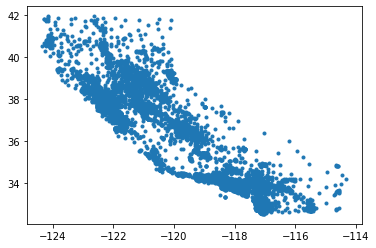

In [18]:
#imprimindo o mapa da California e vendo que latitude e longitude tem correlação alta
plt.plot(df['Longitude'], df['Latitude'], ".")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     5501.
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:33:51   Log-Likelihood:                -6250.8
No. Observations:                1001   AIC:                         1.251e+04
Df Residuals:                     999   BIC:                         1.252e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -163.2451      7.882    -20.711      0.0

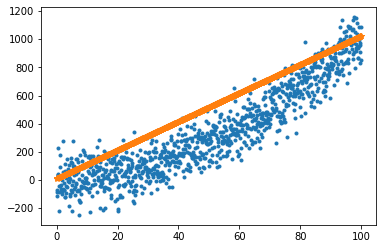

In [34]:
X = np.linspace(0, 100, 1001)
Y = 10 + 0.1 *X*X + np.random.randn(len(X))*100
results = sm.OLS(Y, sm.add_constant(X)).fit()
print(results.summary())
plt.plot(X, Y, ".")
pred = np.ones(len(X)) * results.params[1] + X*results.params[1]
plt.plot(X, pred, '*')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     8666.
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:57:57   Log-Likelihood:                -6031.4
No. Observations:                1001   AIC:                         1.207e+04
Df Residuals:                     999   BIC:                         1.208e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.2881      4.750      4.271      0.0

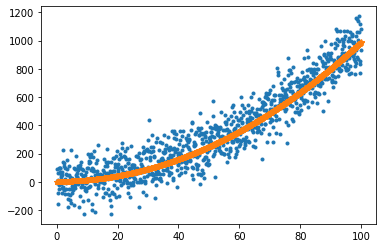

In [37]:
X = np.linspace(0, 100, 1001)  
X2 = X*X
Y = 10 + 0.1 *X*X + np.random.randn(len(X))*100
results = sm.OLS(Y, sm.add_constant(X2)).fit()
print(results.summary())
plt.plot(X, Y, ".")
pred = np.ones(len(X)) * results.params[1] + X2*results.params[1]
plt.plot(X, pred, '*')
plt.show()